In [1]:
pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 19.7 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 20.6 MB/s eta 0:00:00


In [2]:
pip install nltk rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=e56de77a0691412252412c443bc9ab6d5d7c21e32e920466c66990849055a778
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


In [16]:
pip install sacrebleu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.3/106.3 kB 1.4 MB/s eta 0:00:00


In [41]:
from datasets import load_metric
from transformers import pipeline
import pandas as pd
import numpy as np

In [29]:
summaries = {}

### The testing data


In [4]:
text="""HIF in atherosclerosis. An increasing amount of evidence
suggests that hypoxia and oxygen interference are the pathogenesis of atherosclerosis. The hypoxia theory of atherosclerosis posits
that an imbalance between oxygen supply and demand in the
arterial wall leads to the formation of lesions and plaques.88 HIF-1
plays a crucial role in the advancement of atherosclerosis by
initiating and promoting foam cell formation, endothelial dysfunction, cellular apoptosis, heightened inflammation, and neovascularization.89,90 Within the atherosclerotic lesions in human
coronary arteries, hypoxic regions are present, and the progression of the disease is associated with the formation of lipid-laden
macrophages (foamy macrophages), local inflammation, and
increased vascularization. Immune responses, in particular, drive
the pathogenesis of atherosclerosis. It has been found that
atherosclerotic lesion formation is associated with an upregulated
expression of HIF-1α in atherosclerotic lesions and antigenpresenting cells (APCs) in atherosclerosis-prone mice. By selectively knocking out HIF-1α in CD11c+ (as a marker of dendritic
cells) APCs, it has been observed that the formation of
atherosclerotic plaques and the infiltration of T cells in lowdensity lipoprotein receptor-deficient (Ldlr−/−) mice are accelerated.91 These findings offer unprecedented insights into the
function of HIF-1α in APCs in atherosclerosis, and identify HIF-1α
to antagonize APC activation and Th1 T cell polarization during
atherosclerosis in Ldlr−/− mice and to attenuate the progression of
atherosclerosis. Furthermore, previous research mainly studied
HIF-1α’s link to atherosclerosis, while recent studies are exploring
HIF-2α’s role. The adipose metabolic dysfunction caused by
obesity stands as a primary culprit behind atherosclerosis. HIF-2α
in adipocytes has been observed to be upregulated after mild cold
exposure at 16 °C and mediate cold-induced thermogenesis.
Adipocyte HIF-2α deficiency exacerbated Western-diet-induced
atherosclerosis by increasing adipose ceramide levels, which could
blunt hepatocyte cholesterol elimination and thermogenesis.92
This research highlights adipocyte HIF-2α as a putative pharmacological target for combating atherosclerosis"""


summarry="""The passage discusses the role of hypoxia-inducible factor (HIF) in atherosclerosis, emphasizing its contribution to the advancement of the disease.
 Specifically, HIF-1 is implicated in promoting foam cell formation, endothelial dysfunction, cellular apoptosis, inflammation, and neovascularization within atherosclerotic lesions.
  The upregulated expression of HIF-1α in atherosclerotic lesions and antigen-presenting cells (APCs) is associated with the progression of atherosclerosis.
   Notably, selective knockout of HIF-1α in APCs accelerates the formation of atherosclerotic plaques and T cell infiltration, indicating its role in attenuating the progression of atherosclerosis.
    Furthermore, recent studies have explored the role of HIF-2α in atherosclerosis, highlighting its upregulation in adipocytes after mild cold exposure and its potential as a pharmacological target for combating atherosclerosis.
     Adipocyte HIF-2α deficiency exacerbates Western-diet-induced atherosclerosis by increasing adipose ceramide levels, which could impair hepatocyte cholesterol elimination and thermogenesis

"""

# Falconsai/medical_summarization

In [5]:
falcon_summarizer = pipeline("summarization", model="Falconsai/medical_summarization")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.50k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.37k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

In [7]:
falcon=falcon_summarizer(text, max_length=200, min_length=100, do_sample=False)
falcon

[{'summary_text': 'adipocyte HIF-2 plays a crucial role in the advancement of atherosclerosis by initiating and promoting foam cell formation, endothelial dysfunction, cellular apoptosis, heightened inflammation , and neovascularization . this study highlights the role of adipose metabolic dysfunction caused by obesity as a primary culprit . the aim of this study was to identify a pharmacological target for combating atheroserosclerosis . we aimed to identify HIF-1 to antagonize APC activation and Th1 T cell polarization during athemispheres in lowdensity lipoprotein receptor-deficient (Ldlr/) mice .'}]

In [30]:
summaries["falcon"] = falcon[0]['summary_text']

# Abdulkader/autotrain-medical-reports-summarizer-2484176581

In [8]:
autotrain_summarizer = pipeline("summarization", model="Abdulkader/autotrain-medical-reports-summarizer-2484176581")

config.json:   0%|          | 0.00/1.52k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.53k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

In [9]:
autotrain=autotrain_summarizer(text, max_length=200, min_length=100, do_sample=False)
autotrain

Token indices sequence length is longer than the specified maximum sequence length for this model (591 > 512). Running this sequence through the model will result in indexing errors


[{'summary_text': 'Adipocyte HIF-1 plays a crucial role in the progression of atherosclerosis by initiating and promoting foam cell formation, endothelial dysfunction, cellular apoptosis, heightened inflammation, and neovascularization. This finding provides unprecedented insights into the function of HIF-2 in APCs and to attenuate adipose metabolic dysfunction caused by obesity. This research underscores the role of adipocytes as a putative pharmacological target for combating atherotism.'}]

In [32]:
summaries["autotrain"] = autotrain[0]['summary_text']

# alibidaran/t5-small-medical_transcription

In [10]:
t5small_summarizer = pipeline("summarization", model="alibidaran/t5-small-medical_transcription")

config.json:   0%|          | 0.00/1.47k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/142 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.35k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

In [11]:
t5small=t5small_summarizer(text, max_length=200, min_length=100, do_sample=False)
t5small

Token indices sequence length is longer than the specified maximum sequence length for this model (591 > 512). Running this sequence through the model will result in indexing errors


[{'summary_text': 'An increasing amount of evidence suggests that hypoxia and oxygen interference are the pathogenesis of atherosclerosis. Adipocyte HIF-2 deficiency exacerbated Western-diet-induced athemrosclerosis by increasing adipose ceramide levels, which could blunt hepatocyte cholesterol elimination and thermogenesis. Molecular apoptosis, heightened inflammation, and neovascularization. HIF-1 plays a crucial role in the advancement'}]

In [33]:
summaries["t5small"] =t5small[0]['summary_text']

# alibidaran/mt5-small-medical_transcription 2

In [12]:
t5small2_summarizer = pipeline("summarization", model="alibidaran/mt5-small-medical_transcription")

config.json:   0%|          | 0.00/773 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.20G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/142 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/445 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/4.31M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/16.3M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/74.0 [00:00<?, ?B/s]

In [13]:
t5small2=t5small2_summarizer(text, max_length=200, min_length=100, do_sample=False)
t5small2

[{'summary_text': '<extra_id_0> activation.99,90 HIF-1α increases incidence of HIF-1α.99,90 HIF-1α increases incidence.99,90 HIF-1α increases incidence.99,90  <extra_id_6>.99,90 <extra_id_51>.99,90 .99,90 <extra_id_51>.99,90. <extra_id_54>.99,90.99.0. <extra_id_56>. ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ...'}]

In [37]:
summaries["t5small2"] =t5small2[0]['summary_text']

In [38]:
summaries

{'falcon': 'adipocyte HIF-2 plays a crucial role in the advancement of atherosclerosis by initiating and promoting foam cell formation, endothelial dysfunction, cellular apoptosis, heightened inflammation , and neovascularization . this study highlights the role of adipose metabolic dysfunction caused by obesity as a primary culprit . the aim of this study was to identify a pharmacological target for combating atheroserosclerosis . we aimed to identify HIF-1 to antagonize APC activation and Th1 T cell polarization during athemispheres in lowdensity lipoprotein receptor-deficient (Ldlr/) mice .',
 'autotrain': 'Adipocyte HIF-1 plays a crucial role in the progression of atherosclerosis by initiating and promoting foam cell formation, endothelial dysfunction, cellular apoptosis, heightened inflammation, and neovascularization. This finding provides unprecedented insights into the function of HIF-2 in APCs and to attenuate adipose metabolic dysfunction caused by obesity. This research unde

In [14]:
from datasets import load_metric

In [17]:
bleu_metric = load_metric("sacrebleu")

/usr/local/lib/python3.10/dist-packages/datasets/load.py:752: FutureWarning: The repository for sacrebleu contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.16.1/metrics/sacrebleu/sacrebleu.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


## sacrebleu on falcon

In [51]:
bleu_metric.add(prediction = [summaries["falcon"]], reference = [summarry])

results = bleu_metric.compute(smooth_method = 'floor', smooth_value = 0 )

results['precision'] = [np.round(p , 2) for p in results['precisions'] ]

pd.DataFrame.from_dict(results, orient = 'index', columns = ['Value'] )

,Value
score,12.26237
counts,"[47, 26, 16, 11]"
totals,"[92, 91, 90, 89]"
precisions,"[51.08695652173913, 28.571428571428573, 17.777..."
bp,0.515281
sys_len,92
ref_len,153
precision,"[51.09, 28.57, 17.78, 12.36]"


## sacrebleu on autotrain

In [52]:
bleu_metric.add(prediction = [summaries["autotrain"]], reference = [summarry])

results = bleu_metric.compute(smooth_method = 'floor', smooth_value = 0 )

results['precision'] = [np.round(p , 2) for p in results['precisions'] ]

pd.DataFrame.from_dict(results, orient = 'index', columns = ['Value'] )

,Value
score,9.660744
counts,"[44, 25, 16, 11]"
totals,"[72, 71, 70, 69]"
precisions,"[61.111111111111114, 35.2112676056338, 22.8571..."
bp,0.324652
sys_len,72
ref_len,153
precision,"[61.11, 35.21, 22.86, 15.94]"


## sacrebleu on t5small

In [53]:
bleu_metric.add(prediction = [summaries["t5small"]], reference = [summarry])

results = bleu_metric.compute(smooth_method = 'floor', smooth_value = 0 )

results['precision'] = [np.round(p , 2) for p in results['precisions'] ]

pd.DataFrame.from_dict(results, orient = 'index', columns = ['Value'] )

,Value
score,5.423949
counts,"[35, 19, 13, 8]"
totals,"[57, 56, 55, 54]"
precisions,"[61.40350877192982, 33.92857142857143, 23.6363..."
bp,0.185591
sys_len,57
ref_len,153
precision,"[61.4, 33.93, 23.64, 14.81]"


## sacrebleu on t5small2

In [54]:
bleu_metric.add(prediction = [summaries["t5small2"]], reference = [summarry])

results = bleu_metric.compute(smooth_method = 'floor', smooth_value = 0 )

results['precision'] = [np.round(p , 2) for p in results['precisions'] ]

pd.DataFrame.from_dict(results, orient = 'index', columns = ['Value'] )

,Value
score,0.0
counts,"[8, 1, 0, 0]"
totals,"[142, 141, 140, 139]"
precisions,"[5.633802816901408, 0.7092198581560284, 0.0, 0.0]"
bp,0.92546
sys_len,142
ref_len,153
precision,"[5.63, 0.71, 0.0, 0.0]"


# Rouge Analysis

In [19]:
rouge_metric = load_metric('rouge')

/usr/local/lib/python3.10/dist-packages/datasets/load.py:752: FutureWarning: The repository for rouge contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.16.1/metrics/rouge/rouge.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


In [114]:
rouge_names = ["rouge1", "rouge2", "rougeL", "rougeLsum"]

reference = summarry

records = []

for model_name in summaries:
    rouge_metric.add(prediction = summaries[model_name], reference = reference )
    score = rouge_metric.compute()
    rouge_dict = dict((rn, score[rn].mid.fmeasure ) for rn in rouge_names )
    print('rouge_dict ', rouge_dict )
    records.append(rouge_dict)

data=pd.DataFrame.from_records(records, index = summaries.keys() )
data['Model'] = data.index
data = data[['Model', 'rouge1', 'rouge2', 'rougeL', 'rougeLsum']]
data.reset_index(drop=True, inplace=True)
data

rouge_dict  {'rouge1': 0.36771300448430494, 'rouge2': 0.22624434389140272, 'rougeL': 0.25112107623318386, 'rougeLsum': 0.34080717488789236}
rouge_dict  {'rouge1': 0.3980582524271844, 'rouge2': 0.2549019607843137, 'rougeL': 0.30097087378640774, 'rougeLsum': 0.35922330097087374}
rouge_dict  {'rouge1': 0.36923076923076925, 'rouge2': 0.22797927461139894, 'rougeL': 0.25641025641025644, 'rougeLsum': 0.3487179487179487}
rouge_dict  {'rouge1': 0.08163265306122448, 'rouge2': 0.041237113402061855, 'rougeL': 0.08163265306122448, 'rougeLsum': 0.08163265306122448}


,Model,rouge1,rouge2,rougeL,rougeLsum
0,falcon,0.367713,0.226244,0.251121,0.340807
1,autotrain,0.398058,0.254902,0.300971,0.359223
2,t5small,0.369231,0.227979,0.256410,0.348718
3,t5small2,0.081633,0.041237,0.081633,0.081633


In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

## Graph of Rouge for each model

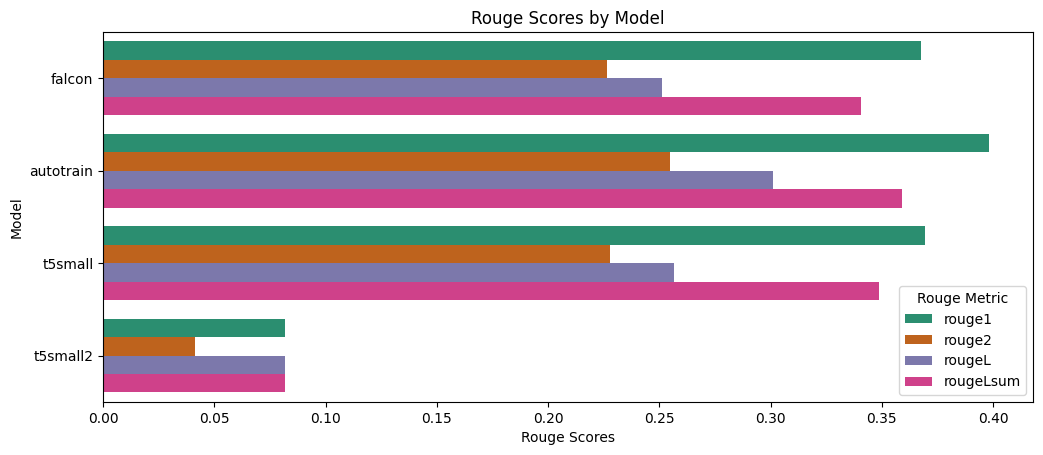

In [116]:
fig, ax = plt.subplots(figsize=(12, 1.2 * len(data['Model'].unique())))
melted_df = data.melt(id_vars=['Model'], var_name='Rouge Metric', value_name='Score')
sns.barplot(data=melted_df, x='Score', y='Model', hue='Rouge Metric', palette='Dark2', ax=ax)

plt.xlabel('Rouge Scores')
plt.ylabel('Model')
plt.title('Rouge Scores by Model')

plt.legend(title='Rouge Metric')

plt.show()

### Average of Rouge

In [128]:
df = pd.DataFrame(data)
df['Average_Rouge'] = df.iloc[:, 1:5].mean(axis=1)
print(df[[ 'Average_Rouge']])

   Average_Rouge
0       0.296471
1       0.328289
2       0.300585
3       0.071534


### Graph for Average Rouge

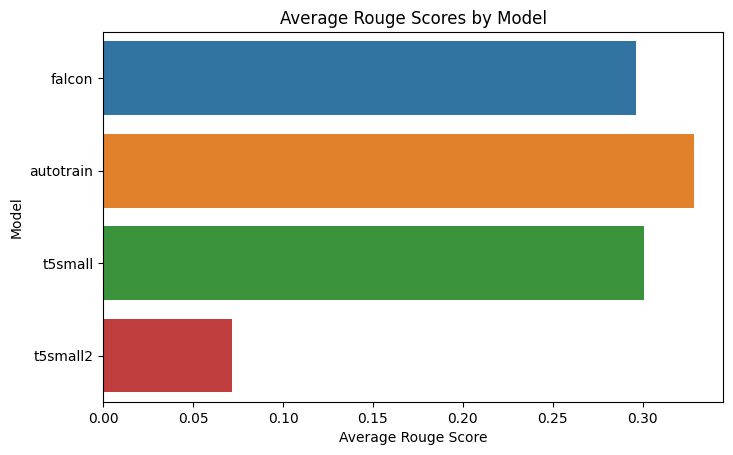

In [127]:
fig, ax = plt.subplots(figsize=(8, 1.2 * len(df.index)))

# Use seaborn's barplot
sns.barplot(data=df, x='Average_Rouge', y='Model', hue='Model', ax=ax)

# Set labels and title
plt.xlabel('Average Rouge Score')
plt.ylabel('Model')
plt.title('Average Rouge Scores by Model')

# Display the plot
plt.show()